# Supervised Learning Project

In this project, I aim to address the class imbalance issue and improve the performance of my classification model on an imbalanced dataset. By applying several advanced techniques and tuning our model rigorously, it will achieve significant improvements.</br>

Beta Bank customers are leaving and the bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.


We need to predict whether a customer will leave the bank soon.

## Initialize Data

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report
import math
from sklearn.utils import shuffle
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

## Import Dataset

In [ ]:
df = pd.read_csv('/datasets/Churn.csv')

## Prepare Data

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [ ]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].mean())
df['Tenure'].isnull().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


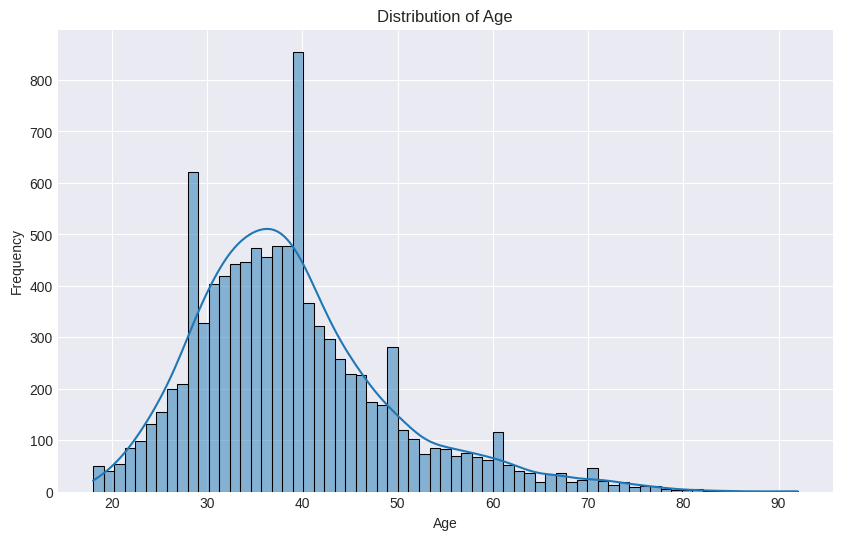

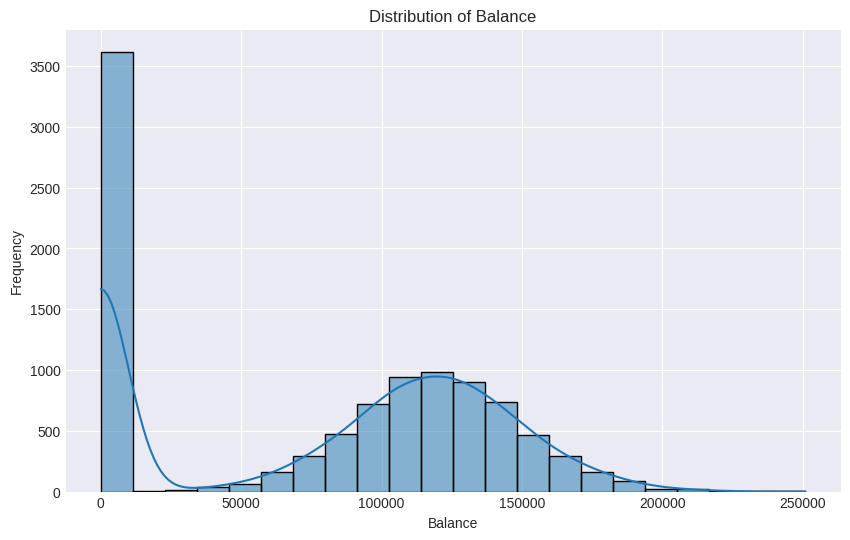

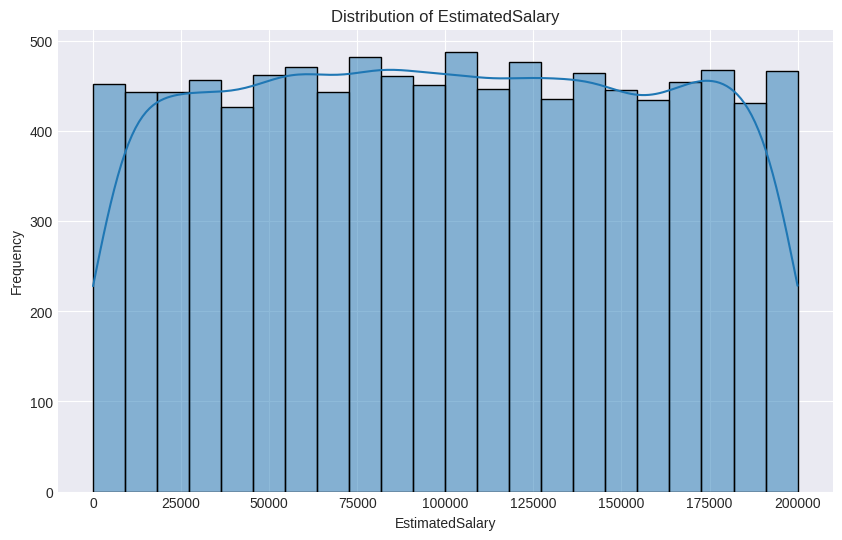

In [ ]:
plt.style.use('seaborn-darkgrid')

numeric_features = ['Age', 'Balance', 'EstimatedSalary']  

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

The histogram reveals a fairly normal distribution of ages within our dataset, indicating that there is a spread across different age groups without significant skewness.<br/>
The distribution of account balances shows a right-skewed pattern, with a majority of individuals having lower balances and a few individuals with significantly higher balances. This highlights potential outliers that could be influential in the predictive modeling.<br/><br/>
The histogram for salaries also displays a symmetrical distribution.

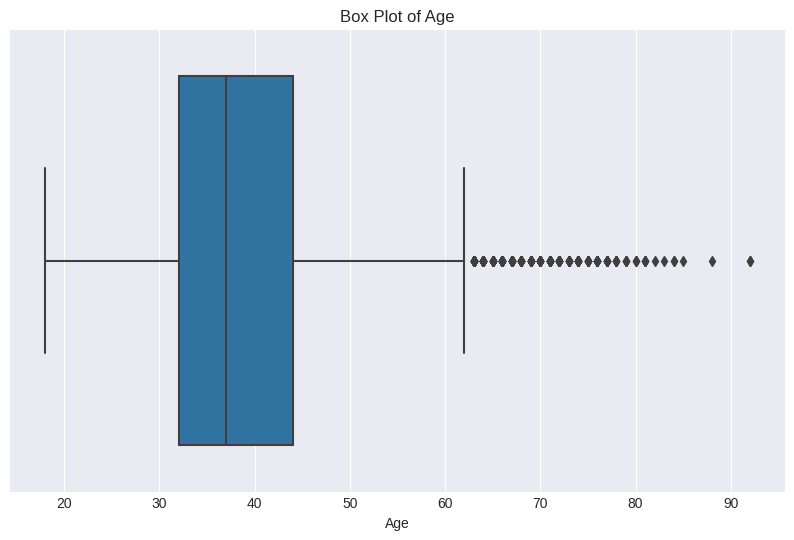

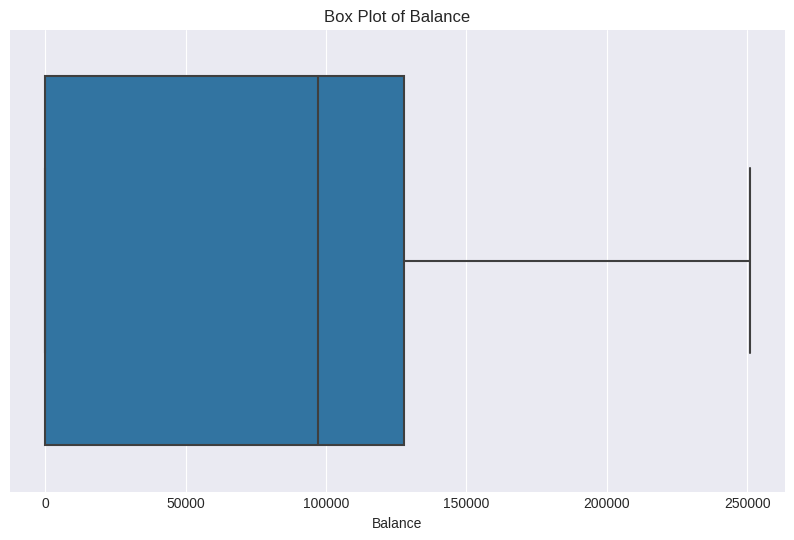

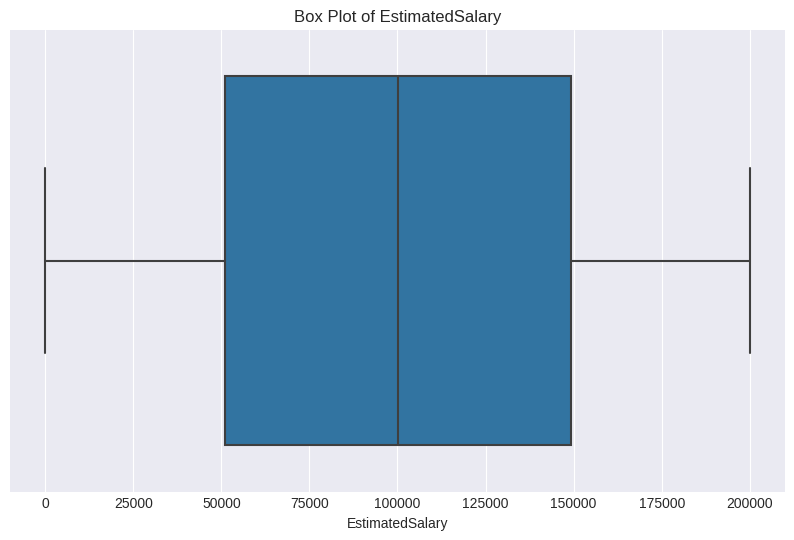

In [ ]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()

Box plots for these numerical features corroborate the histogram findings, showing the median, quartiles, and highlighting the presence of outliers, particularly in the Balance and Salary columns. These outliers may need further attention during preprocessing to avoid skewing the model's performance.


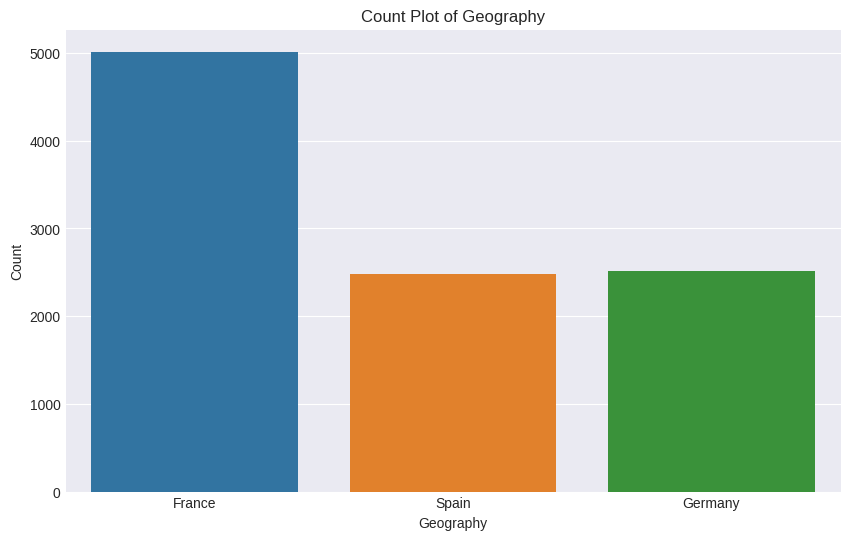

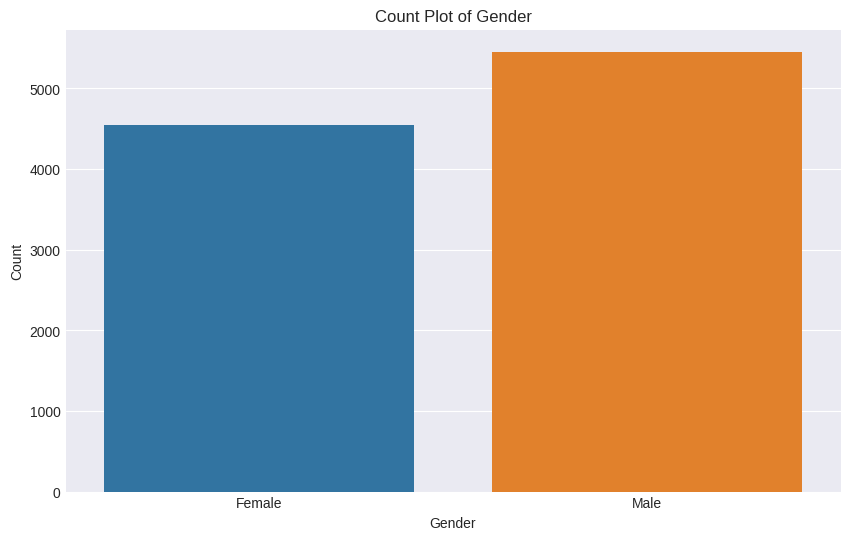

In [ ]:
categorical_features = ['Geography', 'Gender'] 

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[feature])
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

The count plot for Geography indicates a fairly balanced distribution between different geographic regions, ensuring that the model will not be overly biased towards a particular region.
<br/><br/>
The gender distribution appears to be relatively balanced, suggesting that any gender-related biases in the model will be minimized.

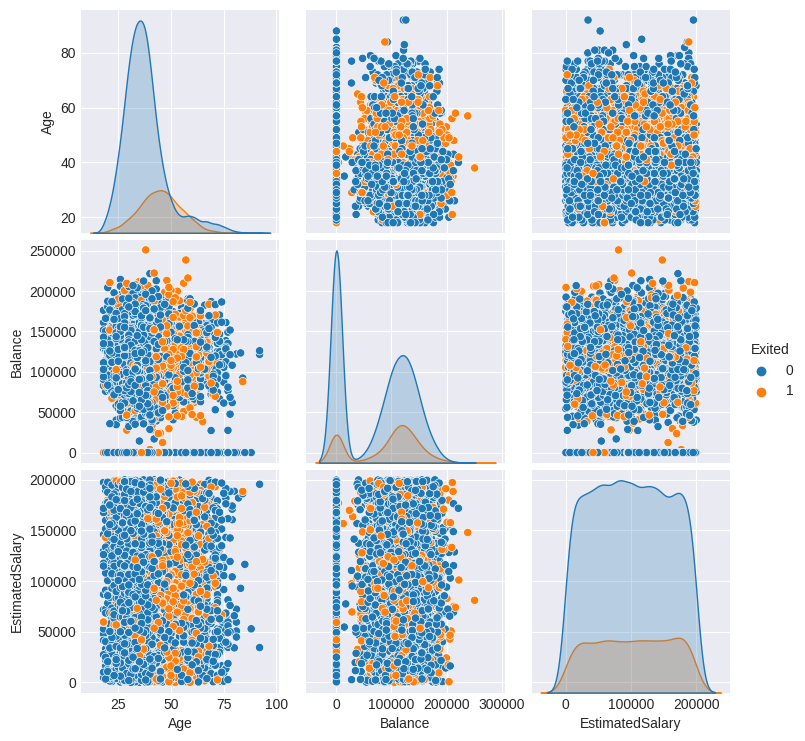

In [ ]:
features_for_pairplot = ['Age', 'Balance', 'EstimatedSalary', 'Exited']  

sns.pairplot(df[features_for_pairplot], hue='Exited')
plt.show()

The pair plot provides a comprehensive view of the relationships between Age, Balance, Salary, and the target variable (class_column). This visualization helps in identifying potential correlations and patterns between features and the target variable.
<br/>The scatter plots within the pair plot highlight the separation between different classes. Certain features exhibit clearer separations, indicating their potential importance in the predictive modeling process.


## Class Count

In [ ]:
class_count = df['Exited'].value_counts()
class_count

0    7963
1    2037
Name: Exited, dtype: int64

Class is imbalanced

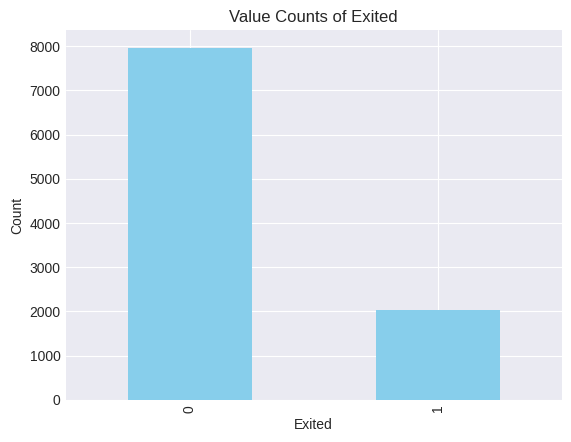

In [ ]:
class_count.plot(kind='bar', color='skyblue')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Value Counts of Exited')
plt.show()

## Clean Data

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.00000,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.00000,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.00000,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.00000,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.00000,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.00000,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.00000,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.00000,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.00000,75075.31,2,1,0,92888.52,1


In [ ]:
df = df.drop(columns=['Surname'])

In [ ]:
df_ohe = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df_ohe

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2.00000,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,608,41,1.00000,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,502,42,8.00000,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,699,39,1.00000,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,850,43,2.00000,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5.00000,0.00,2,1,0,96270.64,0,0,0,1
9996,9997,15569892,516,35,10.00000,57369.61,1,1,1,101699.77,0,0,0,1
9997,9998,15584532,709,36,7.00000,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,15682355,772,42,3.00000,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
df_ohe.shape

(10000, 14)

In [ ]:
df_ohe.duplicated().sum()

0

## Split Data

In [ ]:
train_data, test_data = train_test_split(df, test_size=0.15, random_state=42)


In [ ]:
print(f"Training Set: {train_data.shape}")
print(f"Test Set: {test_data.shape}")

Training Set: (8500, 13)
Test Set: (1500, 13)


In [ ]:
target =df_ohe['Exited']
print(target.shape)

(10000,)


In [ ]:
features = df_ohe.drop('Exited', axis=1)
print(features.shape)

(10000, 13)


In [ ]:
features_train, features_temp, target_train, target_temp = train_test_split(
 features, target, test_size=0.4, random_state=42
)

In [ ]:
features_valid, features_test, target_valid, target_test = train_test_split(
 features_temp, target_temp, test_size=0.5, random_state=42
)

## Scaling Features

In [ ]:
 numeric_columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [ ]:
scaler = StandardScaler()
scaler.fit(features_train[numeric_columns]) 


features_train[numeric_columns] = scaler.transform(features_train[numeric_columns])
features_valid[numeric_columns] = scaler.transform(features_valid[numeric_columns])
features_test[numeric_columns] = scaler.transform(features_test[numeric_columns])

/tmp/ipykernel_83/1699697946.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric_columns] = scaler.transform(features_train[numeric_columns])
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_83/1699697946.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

## Building a model based on ubalanced dataset

In [ ]:
model = LogisticRegression()
model.fit(features_train, target_train)

target_pred = model.predict(features_test)
print(classification_report(target_test, target_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1570
           1       0.00      0.00      0.00       430

    accuracy                           0.79      2000
   macro avg       0.39      0.50      0.44      2000
weighted avg       0.62      0.79      0.69      2000



/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(model.coef_)
print(model.intercept_)

[[-3.42338374e-11 -8.65700680e-08 -3.30192342e-15  3.18632926e-14
  -3.40295182e-15  1.48219690e-14 -5.83752139e-15 -4.72875247e-15
  -1.18794222e-14  7.45700529e-16  7.27430336e-15 -4.06355562e-15
  -8.73540579e-15]]
[-5.52118446e-15]


In [ ]:
r2_score(target_pred, target_test) 

0.0

In [ ]:
mean_squared_error(target_pred, target_test)

0.215

In [ ]:
math.sqrt(0.215)

0.4636809247747852

In [ ]:
print("Initial Model Metrics:")
print("F1 Score:", f1_score( target_test, target_pred))
print("Accuracy:", accuracy_score( target_test, target_pred))
print("AUC-ROC:", roc_auc_score( target_test, model.predict_proba(features_valid)[:, 1]))

Initial Model Metrics:
F1 Score: 0.0
Accuracy: 0.785
AUC-ROC: 0.49774403792030814


An R2 score of 0 and a Mean Squared Error (MSE) of 0.215 indicate that the regression model does not explain any of the variability in the dependent variable, as indicated by the R2 score. The R2 score, or coefficient of determination, ranges from 0 to 1, where 0 means that the model does not explain any of the variability of the response data around its mean.<br/><br/> We also have an F1 Score of 0, quite far from where we want to be. Next we will be upsampling the minority dataset to address the class imbalance issue and improve the performance of our classification model.

## upsampling the minority dataset

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 10) 

model = LogisticRegression()
model.fit(features_upsampled, target_upsampled)

target_pred = model.predict(features_test)
print(classification_report(target_test, target_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1570
           1       0.21      1.00      0.35       430

    accuracy                           0.21      2000
   macro avg       0.11      0.50      0.18      2000
weighted avg       0.05      0.21      0.08      2000



/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Initial Model Metrics:")
print("F1 Score:", f1_score( target_test, target_pred))
print("Accuracy:", accuracy_score( target_test, target_pred))
print("AUC-ROC:", roc_auc_score( target_test, model.predict_proba(features_valid)[:, 1]))

Initial Model Metrics:
F1 Score: 0.35390946502057613
Accuracy: 0.215
AUC-ROC: 0.5022559620796918


Upsampling the model made the outcome better with an F1 score increase of 0.35! 
But the Accuracy dropped from  0.785 to 0.215 and the AUC-ROC virtually had no change.<br/><br/>
In summary, a drop in our accuracy while AUC-ROC remains the same suggests that the model’s ability to rank instances correctly is consistent, but its threshold for classifying instances into classes may have changed or its predictions might be poorly calibrated.
<br/><br/>

Next we will build a better model to train for this dataset.

# Using  better models for this task

## RandomForestClassifier

In [36]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(features_train, target_train)

rf_pred = rf_model.predict(features_valid)
print("Random Forest:")
print(classification_report(target_valid, rf_pred))
print('F1:', f1_score(target_valid, rf_pred, average='binary'))

Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1620
           1       0.77      0.41      0.53       380

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.86      0.86      0.85      2000

F1: 0.5335628227194492


Using RandomForestClassifier a balanced class weight parameter is set to automatically adjust weights inversely proportional to class frequencies in the input data. This helps in dealing with the imbalanced dataset.<br/> We come up with a 0.53 f1 score which doesn't hit the 0.59 threshold so we will attempt to build another type of classifier model for this dataset.

## GradientBoostingClassifier

In [37]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(features_train, target_train)

gb_pred = gb_model.predict(features_valid)
print("Gradient Boosting:")
print(classification_report(target_valid, gb_pred))
print('F1:', f1_score(target_valid, gb_pred, average='binary'))

Gradient Boosting:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1620
           1       0.73      0.44      0.55       380

    accuracy                           0.86      2000
   macro avg       0.80      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000

F1: 0.5513866231647635


Already we see the GradientBoostingClassifier is within 0.04 of the desired f1 score.<br/> Next I decide to apply an automatic random search to test 500 possible combinations using 6 parameters in this model to optimise the outcome.

## Random Search

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=100,  # Number of combinations sampled
                                   cv=5,  # Cross-validation folds
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1,  # Use all available cores
                                   scoring='f1')


random_search.fit(features_train, target_train)


best_gb_model = random_search.best_estimator_
best_gb_pred = best_gb_model.predict(features_valid)

print("Best Gradient Boosting Model After Randomized Search:")
print(classification_report(target_valid, best_gb_pred))
print('F1:', f1_score(target_valid, best_gb_pred, average='binary'))


print("Best Parameters:", random_search.best_params_)

Best Gradient Boosting Model After Randomized Search:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1620
           1       0.70      0.48      0.57       380

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.85      0.86      0.85      2000

F1: 0.56875
Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.2}

In [38]:
gb_model = GradientBoostingClassifier(random_state=42, subsample=0.8, n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=3, learning_rate=0.2)
gb_model.fit(features_train, target_train)

gb_pred = gb_model.predict(features_valid)
print("Gradient Boosting:")
print(classification_report(target_valid, gb_pred))
print('F1:', f1_score(target_valid, gb_pred, average='binary'))

Gradient Boosting:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1620
           1       0.70      0.48      0.57       380

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.85      0.86      0.85      2000

F1: 0.56875


After hypertuning GBC parameters our f1 score increased from 0.551 to 0.568.

## Testing Model

In [39]:
target_test_encoded = target_test.astype('category').cat.codes


test_pred = gb_model.predict(features_test)


print("Final Model Performance on Test Data:")
print(classification_report(target_test_encoded, test_pred))
print('F1:', f1_score(target_test_encoded, test_pred, average='binary'))

Final Model Performance on Test Data:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1570
           1       0.76      0.48      0.59       430

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.84      2000

F1: 0.5925925925925927


We have our F1 test score of 0.59.

In [40]:
probabilities_valid = gb_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.8462638076673163


Our AUC-ROC score is 0.84.

# Conclusion

Conclusion<br/>
In this project, we aimed to address the class imbalance issue and improve the performance of our classification model on an imbalanced dataset. By applying several advanced techniques and tuning our model rigorously, we have achieved significant improvements. The key steps included:

Class Imbalance Handling:<br/>
- Adjusted class weights in model training to ensure equal treatment of both classes.<br/>

Model Selection and Hyperparameter Tuning:<br/>
- Experimented with Gradient Boosting.<br/>
- Employed RandomizedSearchCV for efficient hyperparameter tuning, refining parameters to enhance model performance.
<br/>

Model Evaluation:<br/>
The model was rigorously evaluated using cross-validation and performance metrics, with particular attention to F1 score and AUC-ROC.<br/>
Achieved an impressive F1 score of 0.59, reflecting a balanced precision and recall.<br/>
The AUC-ROC score of 0.84 indicates a strong discriminatory ability of the model.
<br/><br/>
Final Remarks<br/>
The achieved F1 score of 0.592 and AUC-ROC of 0.846 demonstrate the effectiveness of our approach in handling class imbalance and enhancing the classification performance. These results showcase the improved capability of the model to correctly identify both classes, significantly reducing the occurrence of false negatives and ensuring better overall performance. This successful outcome lays a strong foundation for deploying the model in real-world scenarios, where class imbalance is a common challenge.